# Projet MNIST



Fait par Cazes Florian, Khanjar Youness et Lugiery Valentin

## Importation des packaging et des données 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print("Nombre de données d'entrainement:",X_train.shape[0])
print("Nombre de données de test:",X_test.shape[0])
print("Taille des images:",X_train.shape[1:])

Nombre de données d'entrainement: 60000
Nombre de données de test: 10000
Taille des images: (28, 28)


Afin de réduire les temps d'exécution on ne va pas considérer toutes les données mais seulement une partie d'entre elles:

In [ ]:
nb=1000
X_train=X_train[:nb]
y_train=y_train[:nb]
X_test=X_test[:nb//4]
y_test=y_test[:nb//4]

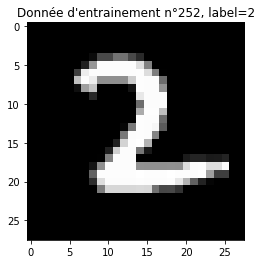

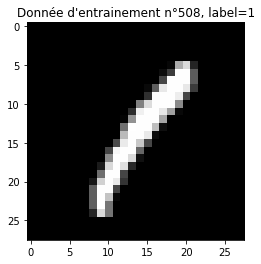

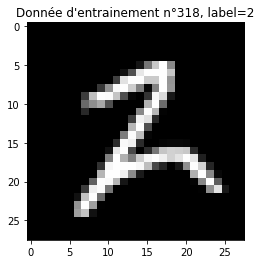

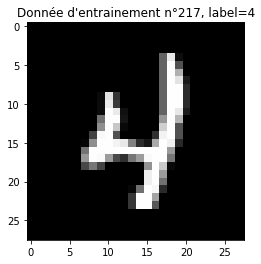

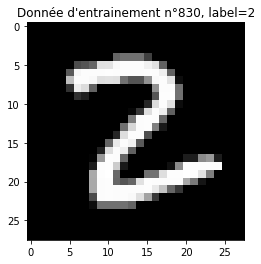

In [ ]:
I=np.random.randint(0,X_train.shape[0],size=5)
for i in I:
    plt.imshow(X_train[i],cmap='gray')
    plt.title("Donnée d'entrainement n°"+str(i)+", label="+str(y_train[i]))
    plt.show()

## Classifieur tous contre un

L'idée de cette stratégie est d'entraîner 10 classifieurs (un pour chaque chiffre). Chaque classifieur construit un hyperplan qui sépare les données présentant le label courant de toutes les autres.

On commence par le classifieur qui discrimine le label 0 des autres.

On modifie donc les labels: 1 si 0 est le chiffre représenté et 0 sinon

In [ ]:
y_train0=np.where(y_train==0,1,0)
y_test0=np.where(y_test==0,1,0)
y_train0.shape

(1000,)

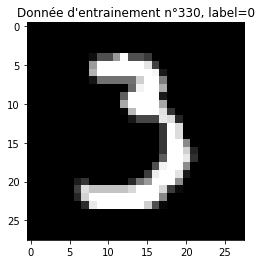

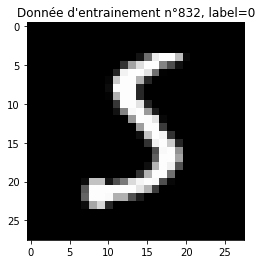

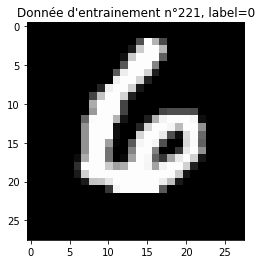

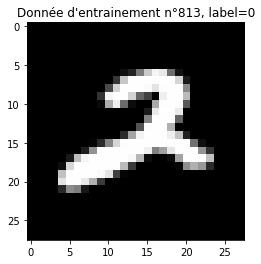

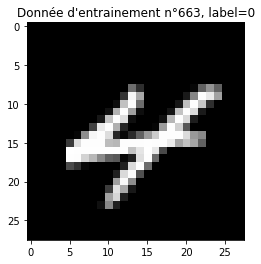

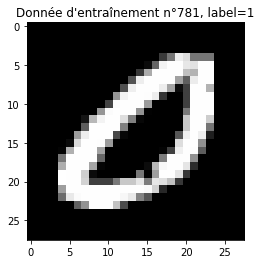

In [ ]:
I=np.random.randint(0,X_train.shape[0],size=5)
for i in I:
    plt.imshow(X_train[i],cmap='gray')
    plt.title("Donnée d'entrainement n°"+str(i)+", label="+str(y_train0[i]))
    plt.show()
plt.imshow(X_train[781],cmap='gray')
plt.title("Donnée d'entraînement n°"+str(781)+", label="+str(y_train0[781]))
plt.show()

Il nous faut également modifier les données d'entraînement en aplanissant les images:

In [ ]:
X_train_model=np.array([X_train[k].reshape(-1) for k in range(X_train.shape[0])])
X_test_model=np.array([X_test[k].reshape(-1) for k in range(X_test.shape[0])])
print(f"Nouvelle dimension X_train:{X_train.shape}")
print(f"Nouvelle dimension X_test:{X_test.shape}")

Nouvelle dimension X_train:(1000, 28, 28)
Nouvelle dimension X_test:(250, 28, 28)


On peut maintenant définir et entraîner notre modèle:

In [ ]:
from sklearn.svm import SVC
c=1
model0=SVC(C=c,kernel='linear')
model0.fit(X_train_model,y_train0)

SVC(C=1, kernel='linear')

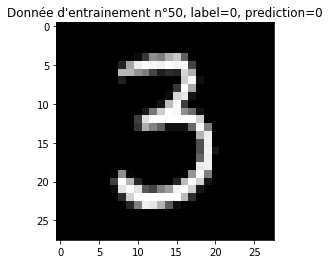

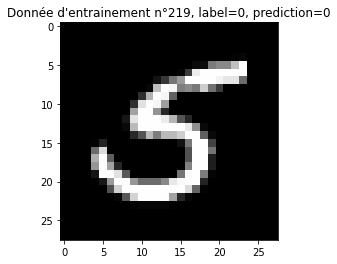

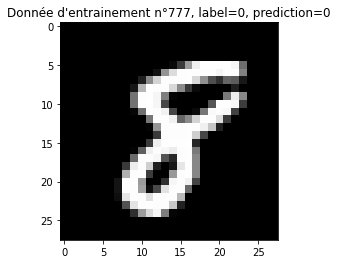

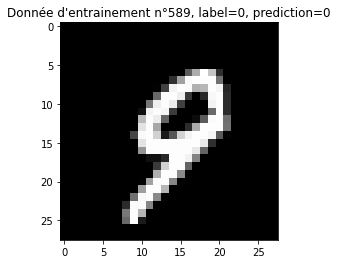

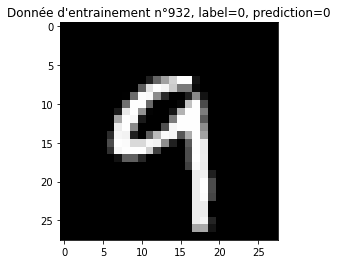

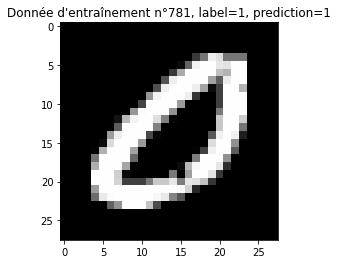

In [ ]:
I=np.random.randint(0,X_train.shape[0],size=5)
for i in I:
    plt.imshow(X_train[i],cmap='gray')
    plt.title("Donnée d'entrainement n°"+str(i)+", label="+str(y_train0[i])+", prediction="+str(model0.predict(X_train_model[i].reshape(1,-1))[0]))
    plt.show()
plt.imshow(X_train[781],cmap='gray')
plt.title("Donnée d'entraînement n°"+str(781)+", label="+str(y_train0[781])+", prediction="+str(model0.predict(X_train_model[781].reshape(1,-1))[0]))
plt.show()

On effectue les mêmes opérations pour construire et entrainer un modèle pour chaque chiffre

In [ ]:
liste_poids=[model0.coef_[0]]
liste_ytrain=[y_train0]
liste_ytest=[y_test0]
c=1
for k in range(1,10):
  print(f"k={k}")
  y_traink=np.where(y_train==k,1,0)
  y_testk=np.where(y_test==k,1,0)
  modelk=SVC(C=c,kernel='linear')
  modelk.fit(X_train_model,y_traink)
  liste_poids.append(modelk.coef_[0])
  liste_ytrain.append(y_traink)
  liste_ytest.append(y_testk)

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9


On peut désormais définir le classifieur multi-label:

In [ ]:
def tous_contre_un(x):
  argmax=0
  for i,poids in enumerate(liste_poids):
    if np.dot(poids,x.reshape(-1))>=np.dot(liste_poids[argmax],x.reshape(-1)):
      argmax=i
  return argmax
    

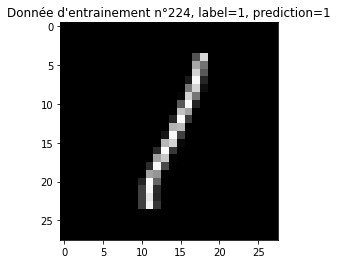

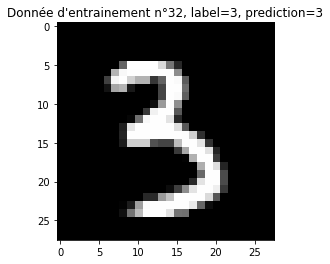

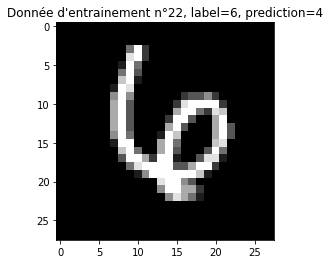

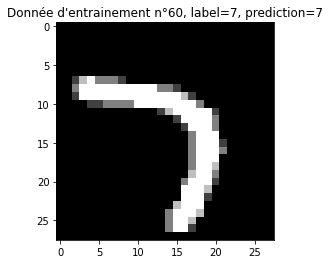

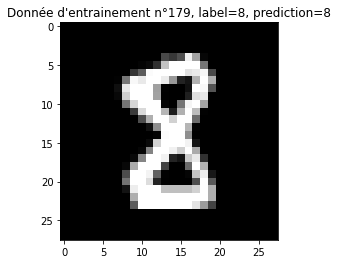

In [ ]:
I=np.random.randint(0,X_test.shape[0],size=5)
for i in I:
    plt.imshow(X_test[i],cmap='gray')
    plt.title("Donnée d'entrainement n°"+str(i)+", label="+str(y_test[i])+", prediction="+str(tous_contre_un(X_test[i])))
    plt.show()

## Classifieur un contre un

On construit un classifieur binaire pour chaque paire de chiffres. Ce classifieur discrimine toutes les instances du premier chiffre de toutes celles du second.

On commence avec le classifieur 0 contre 1

On ne garde que les données dont le label est 0 ou 1

In [ ]:
X_train01=X_train[(y_train==0) | (y_train==1)]
y_train01=y_train[(y_train==0) | (y_train==1)]
X_test01=X_test[(y_test==0) | (y_test==1)]
y_test01=y_test[(y_test==0) | (y_test==1)]

In [ ]:
y_train01[:10]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=uint8)

In [ ]:
X_train01_model=np.array([X_train01[k].reshape(-1) for k in range(X_train01.shape[0])])
X_test01_model=np.array([X_test01[k].reshape(-1) for k in range(X_test01.shape[0])])
print(f"Nouvelle dimension X_train:{X_train01.shape}")
print(f"Nouvelle dimension X_test:{X_test01.shape}")

Nouvelle dimension X_train:(213, 28, 28)
Nouvelle dimension X_test:(53, 28, 28)


In [ ]:
model01=SVC(C=c,kernel='linear')
model01.fit(X_train01_model,y_train01)

SVC(C=1, kernel='linear')

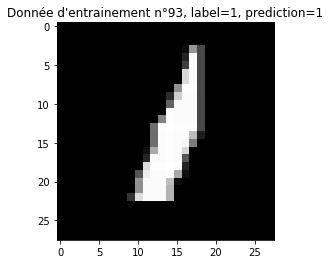

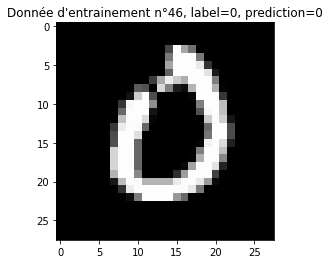

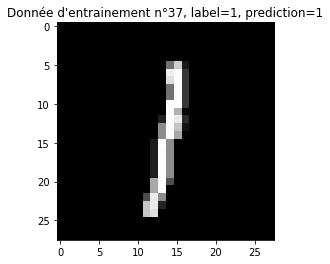

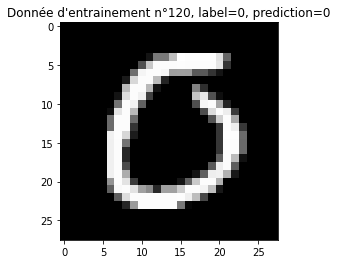

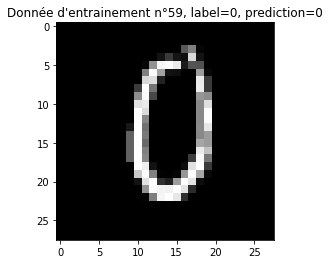

In [ ]:
I=np.random.randint(0,X_train01.shape[0],size=5)
for i in I:
    plt.imshow(X_train01[i],cmap='gray')
    plt.title("Donnée d'entrainement n°"+str(i)+", label="+str(y_train01[i])+", prediction="+str(model01.predict(X_train01[i].reshape(1,-1))[0]))
    plt.show()

On procéde de même pour toutes les paires de chiffres:

In [ ]:
modeles=[]
for k in range(10):
    for l in range(k+1,10):
        X_trainkl=X_train[(y_train==k) | (y_train==l)]
        y_trainkl=y_train[(y_train==k) | (y_train==l)]
        X_testkl=X_test[(y_test==k) | (y_test==l)]
        y_testkl=y_test[(y_test==k) | (y_test==l)]

        X_trainkl_model=np.array([X_trainkl[j].reshape(-1) for j in range(X_trainkl.shape[0])])
        X_testkl_model=np.array([X_testkl[j].reshape(-1) for j in range(X_testkl.shape[0])])

        modelkl=SVC(C=c,kernel='linear')
        modelkl.fit(X_trainkl_model,y_trainkl)
        modeles.append(modelkl)

In [ ]:
def un_contre_un(x):
    votes=np.zeros(10)
    for model in modeles:
        v=model.predict(x.reshape(1,-1))
        votes[v]+=1
    return np.argmax(votes)

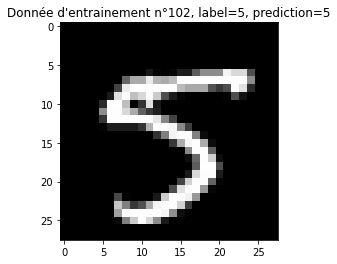

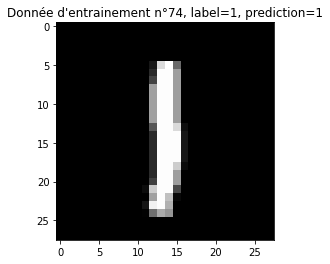

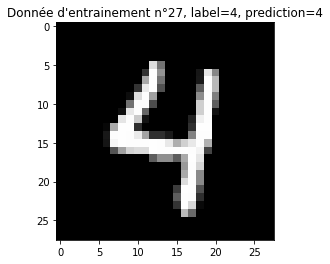

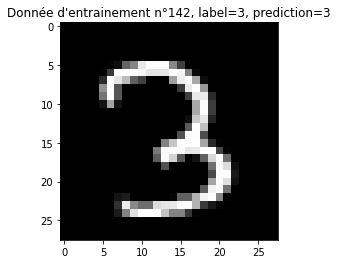

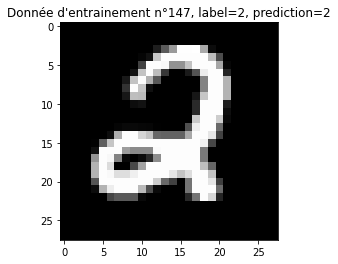

In [ ]:
I=np.random.randint(0,X_test.shape[0],size=5)
for i in I:
    plt.imshow(X_test[i],cmap='gray')
    plt.title("Donnée d'entrainement n°"+str(i)+", label="+str(y_test[i])+", prediction="+str(un_contre_un(X_test[i])))
    plt.show()

# FIN